In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
data=pd.read_excel('Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({"Col":cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})
        

In [8]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,CustomerID,object,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",0
1,Count,int64,1,[1],0
2,Country,object,1,[United States],0
3,State,object,1,[California],0
4,City,object,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",0
5,Zip Code,int64,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",0
6,Lat Long,object,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",0
7,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
8,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
9,Gender,object,2,"[Male, Female]",0


In [9]:
data.drop(['CustomerID','Churn Label','Count','Country','State','Zip Code','Lat Long','City'],axis=1,inplace=True)

In [10]:
data.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [11]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Contract']=le.fit_transform(data['Contract'])

In [13]:
data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [14]:
data['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [15]:
data['Churn Reason'].fillna("not leave",inplace=True)

/var/folders/n7/9n8nsfxn3bl6q8v0b9g_1xr40000gn/T/ipykernel_15299/3116493132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn Reason'].fillna("not leave",inplace=True)


In [16]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [17]:
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')

In [18]:
data['Total Charges'].isna().sum()

11

In [19]:
data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)

/var/folders/n7/9n8nsfxn3bl6q8v0b9g_1xr40000gn/T/ipykernel_15299/2330687429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)


In [20]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [21]:
data_info(data)

,Col,dtype,n_uniques,Unique Values,Nulls
0,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
1,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
2,Gender,object,2,"[Male, Female]",0
3,Senior Citizen,object,2,"[No, Yes]",0
4,Partner,object,2,"[No, Yes]",0
5,Dependents,object,2,"[No, Yes]",0
6,Tenure Months,int64,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",0
7,Phone Service,object,2,"[Yes, No]",0
8,Multiple Lines,object,3,"[No, Yes, No phone service]",0
9,Internet Service,object,3,"[DSL, Fiber optic, No]",0


In [22]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,...,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Churn Reason_not leave
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,True,...,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,False,...,False,False,True,False,False,False,False,False,False,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,False,...,False,False,True,False,False,False,False,False,False,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,False,...,False,False,True,False,False,False,False,False,False,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,True,...,False,False,False,False,False,False,False,False,False,False


In [23]:
X=data.drop(['Churn Value'],axis=1).values
y=data['Churn Value'].values

In [24]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [25]:
#fearture scaling 
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()



train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(train_X.shape[1],)))

model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2700      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.optimizers import SGD,Adam

In [29]:
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [30]:
history=model.fit(train_X,train_y,validation_split=0.1,batch_size=128,epochs=100)

Epoch 1/100
 1/40 [..............................] - ETA: 6s - loss: 0.7073 - accuracy: 0.5312

2025-03-14 15:11:44.889670: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


40/40 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8505 - val_loss: 0.2379 - val_accuracy: 0.9663
Epoch 2/100
40/40 [==============================] - 0s 768us/step - loss: 0.1328 - accuracy: 0.9819 - val_loss: 0.0707 - val_accuracy: 0.9876
Epoch 3/100
40/40 [==============================] - 0s 686us/step - loss: 0.0354 - accuracy: 0.9951 - val_loss: 0.0247 - val_accuracy: 0.9947
Epoch 4/100
40/40 [==============================] - 0s 834us/step - loss: 0.0146 - accuracy: 0.9974 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 5/100
40/40 [==============================] - 0s 778us/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 6/100
40/40 [==============================] - 0s 773us/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/100
40/40 [==============================] - 0s 746us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 8/100
4

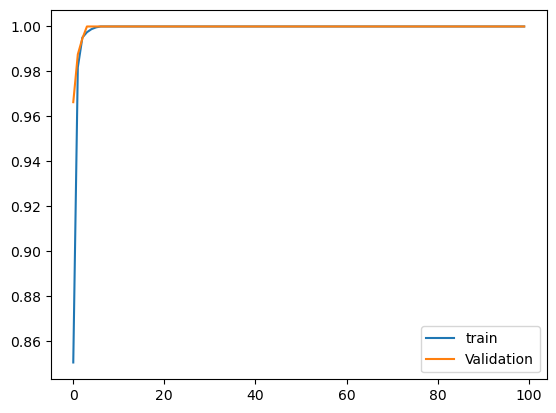

In [31]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

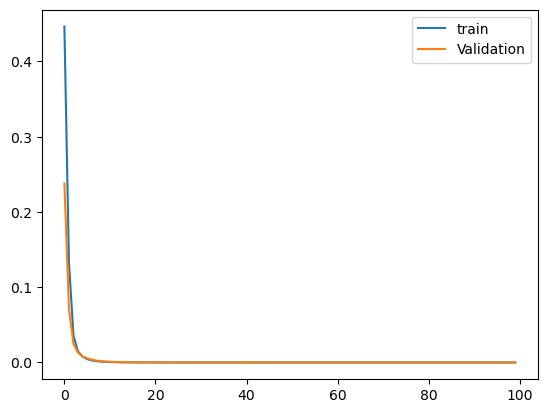

In [32]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

In [33]:
y_pred=model.predict(test_X)

45/45 [==============================] - 0s 327us/step


In [34]:
y_pred_labels = (y_pred > 0.5).astype(int) 

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred_labels)
print(cm)


[[1047    0]
 [   0  362]]


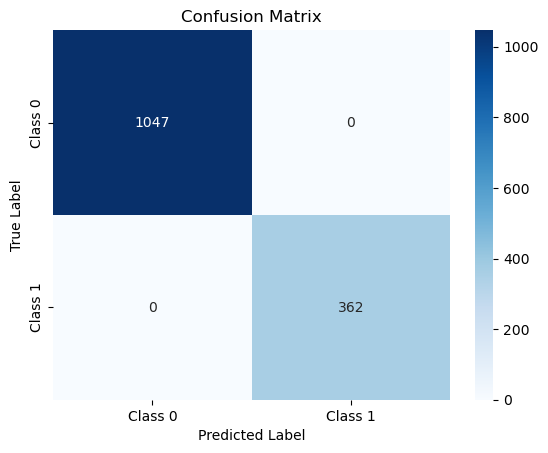

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 1. Add Dropout Layers

In [37]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(train_X.shape[1],)))
model.add(Dropout(0.5))  # 50% dropout

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))  # 50% dropout

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2700      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_X, train_y, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
159/159 [==============================] - 0s 802us/step - loss: 0.4721 - accuracy: 0.7876 - val_loss: 0.0950 - val_accuracy: 0.9965
Epoch 2/100
159/159 [==============================] - 0s 542us/step - loss: 0.1421 - accuracy: 0.9535 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 3/100
159/159 [==============================] - 0s 550us/step - loss: 0.0487 - accuracy: 0.9884 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/100
159/159 [==============================] - 0s 533us/step - loss: 0.0207 - accuracy: 0.9959 - val_loss: 3.3404e-04 - val_accuracy: 1.0000
Epoch 5/100
159/159 [==============================] - 0s 530us/step - loss: 0.0140 - accuracy: 0.9972 - val_loss: 1.2530e-04 - val_accuracy: 1.0000
Epoch 6/100
159/159 [==============================] - 0s 537us/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 4.3693e-05 - val_accuracy: 1.0000
Epoch 7/100
159/159 [==============================] - 0s 561us/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 1.0

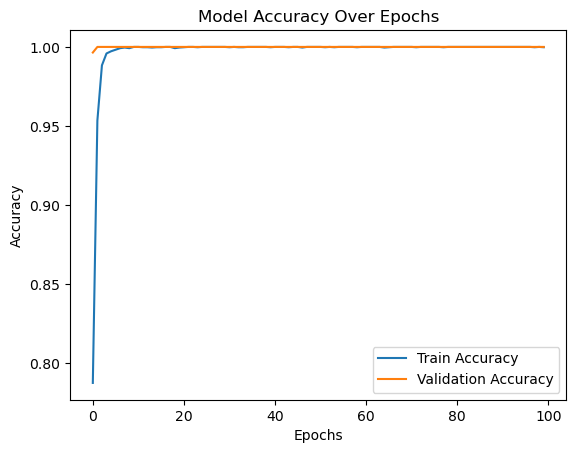

In [39]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [40]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

45/45 [==============================] - 0s 334us/step - loss: 4.4269e-25 - accuracy: 1.0000
Test Accuracy: 1.0000
Test Loss: 0.0000


# 2. Use L2 Regularization (Weight Decay)


In [41]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), input_shape=(train_X.shape[1],)))
model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                2700      
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_X, train_y, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
159/159 [==============================] - 0s 857us/step - loss: 0.7952 - accuracy: 0.9633 - val_loss: 0.4206 - val_accuracy: 0.9982
Epoch 2/100
159/159 [==============================] - 0s 587us/step - loss: 0.2543 - accuracy: 0.9990 - val_loss: 0.1384 - val_accuracy: 1.0000
Epoch 3/100
159/159 [==============================] - 0s 562us/step - loss: 0.0873 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 4/100
159/159 [==============================] - 0s 571us/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 5/100
159/159 [==============================] - 0s 573us/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 6/100
159/159 [==============================] - 0s 567us/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 7/100
159/159 [==============================] - 0s 565us/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0226 - val_ac

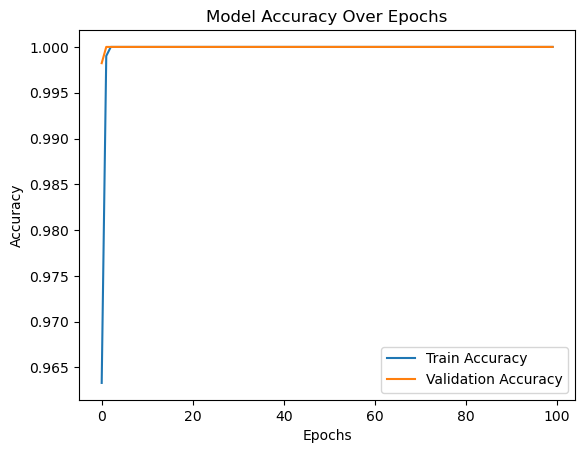

In [43]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [44]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

45/45 [==============================] - 0s 318us/step - loss: 0.0034 - accuracy: 1.0000
Test Accuracy: 1.0000
Test Loss: 0.0034


# 3. Reduce Model Complexity (Fewer Neurons)


In [45]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_X.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                1728      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_X, train_y, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
159/159 [==============================] - 0s 735us/step - loss: 0.2649 - accuracy: 0.9122 - val_loss: 0.0659 - val_accuracy: 0.9876
Epoch 2/100
159/159 [==============================] - 0s 474us/step - loss: 0.0268 - accuracy: 0.9972 - val_loss: 0.0110 - val_accuracy: 0.9982
Epoch 3/100
159/159 [==============================] - 0s 482us/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/100
159/159 [==============================] - 0s 474us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/100
159/159 [==============================] - 0s 461us/step - loss: 4.3099e-04 - accuracy: 1.0000 - val_loss: 5.7617e-04 - val_accuracy: 1.0000
Epoch 6/100
159/159 [==============================] - 0s 477us/step - loss: 1.3971e-04 - accuracy: 1.0000 - val_loss: 2.8368e-04 - val_accuracy: 1.0000
Epoch 7/100
159/159 [==============================] - 0s 455us/step - loss: 5.5996e-05 - accuracy: 1.0000 - val_l

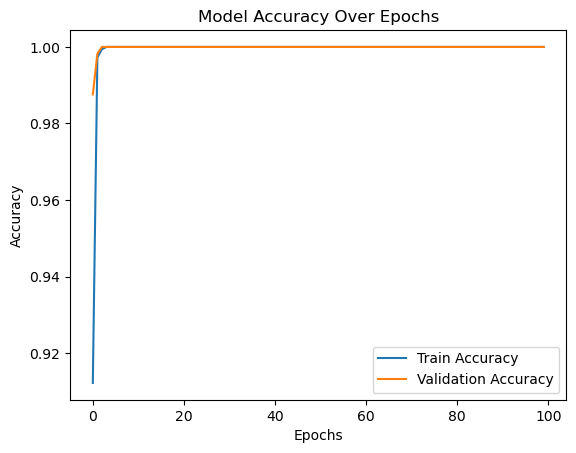

In [47]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [48]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

45/45 [==============================] - 0s 323us/step - loss: 9.6177e-10 - accuracy: 1.0000
Test Accuracy: 1.0000
Test Loss: 0.0000


# 4. Use Early Stopping


In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_X.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                1728      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_X, train_y, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
159/159 [==============================] - 0s 795us/step - loss: 0.2645 - accuracy: 0.9211 - val_loss: 0.0562 - val_accuracy: 0.9858
Epoch 2/100
159/159 [==============================] - 0s 500us/step - loss: 0.0214 - accuracy: 0.9972 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/100
159/159 [==============================] - 0s 477us/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/100
159/159 [==============================] - 0s 503us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 8.3750e-04 - val_accuracy: 1.0000
Epoch 5/100
159/159 [==============================] - 0s 513us/step - loss: 4.7283e-04 - accuracy: 1.0000 - val_loss: 3.4320e-04 - val_accuracy: 1.0000
Epoch 6/100
159/159 [==============================] - 0s 491us/step - loss: 1.8498e-04 - accuracy: 1.0000 - val_loss: 1.1449e-04 - val_accuracy: 1.0000
Epoch 7/100
159/159 [==============================] - 0s 503us/step - loss: 6.5823e-05 - accuracy: 1.0000 - v

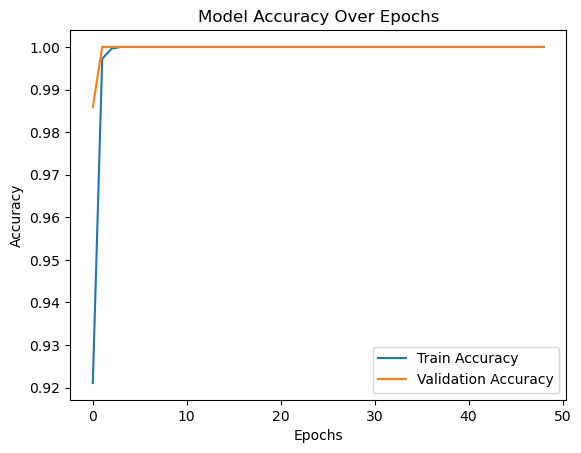

In [57]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [58]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

45/45 [==============================] - 0s 456us/step - loss: 2.1852e-09 - accuracy: 1.0000
Test Accuracy: 1.0000
Test Loss: 0.0000
